In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def GetPositions(filename):
    f = open(filename,'r')
    for i in range(3): f.readline()
    xpos,ypos=[],[]
    for line in f:
        line=map(float,line.split())
        xpos.append(line[0])
        ypos.append(line[1])
    f.close()
    return np.array(xpos),np.array(ypos)

def GetAllPositions(files):
    X,Y = [],[]
    for f in files:
        x,y = GetPositions(f)
        X.append(x)
        Y.append(y)
    return np.array(X),np.array(Y)

def SplitArray(X,n_chunks):
    XX = []
    for x in X:
        x = np.split(x,n_chunks)
        # Skip the first chunk to allow for steady-state
        for j in x[1:]:
            XX.append(j)
    return np.array(XX)

def MSD(x,y):
    msd = []
    x0,y0 = x[0],y[0]
    for i,pos in enumerate(x):
        msd.append((x[i]-x0)**2+(y[i]-y0)**2)
    return msd

def AvgMSD(X,Y):
    msds = []
    for i,x in enumerate(X):
        msds.append(MSD(X[i],Y[i]))
    msds = np.array(msds)
    msd_avg = []
    msd_sem = []
    for i,m in enumerate(msds[0]):
        msd_avg.append(np.mean(msds[:,i]))
        msd_sem.append(np.std(msds[:,i]))
    n = np.sqrt(msds.shape[0])
    msd_sem = [i/n for i in msd_sem]
    return np.array(msd_avg),np.array(msd_sem)

In [22]:
l060_d020_files = ['spiral_diffusion_l060_lp1000_d020_r00'+str(j)+'_filament.posit.txt' for j in range(10)]
l100_d020_files = ['spiral_diffusion_l100_lp1000_d020_r00'+str(j)+'_filament.posit.txt' for j in range(10)]
l060_d030_files = ['spiral_diffusion_l060_lp1000_d030_r00'+str(j)+'_filament.posit.txt' for j in range(10)]
l100_d030_files = ['spiral_diffusion_l100_lp1000_d030_r00'+str(j)+'_filament.posit.txt' for j in range(10)]
X,Y = GetAllPositions(l100_d020_files)
n=10
X,Y = SplitArray(X,n),SplitArray(Y,n)

In [23]:
msd,sem = AvgMSD(X,Y)

0.107860163367


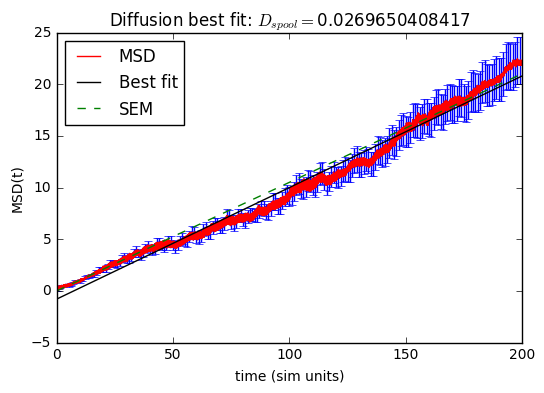

In [24]:
delta = 0.01
D_mean = np.log(100)/(100)
theory = lambda t: 1.14*4*D_mean*0.5*t
time = np.linspace(0,msd.size*delta,msd.size)
fit = np.poly1d(np.polyfit(time,msd,1))
plt.errorbar(time,msd,yerr=sem,errorevery=100)
plt.plot(time,msd,'r-')
plt.plot(time,fit(time),'k-')
print fit[1]
plt.plot(time,theory(time),'g--')
plt.title("Diffusion best fit: "+r'$D_{spool} = $' + str(fit[1]/4.0))
plt.xlabel('time (sim units)')
plt.ylabel('MSD(t)')
plt.legend(['MSD','Best fit','SEM'],loc=0)
plt.show()
plt.close()

In [25]:
20*0.16/25

0.128

In [28]:
filename = "../lp_driving_1_filament.lp"
f=open(filename)
f.readline()
f.readline()
line = f.readline().split()
theory = float(line[len(line)-1])
f.readline()
time,mse2e=[],[]
for line in f:
    line=map(float,line.split())
    time.append(line[0])
    for i in line[1:]:
        mse2e.append(i)
f.close()

In [29]:
time = np.array(time)
mse2e = np.array(mse2e)

In [30]:
print theory
print mse2e.mean()
print mse2e.std()/np.sqrt(100)

1547.97
1528.48773248
4.64430176165


In [27]:
print theory
print mse2e.mean()
print mse2e.std()/np.sqrt(100)

1547.97
1547.72724689
3.22608940778


In [10]:
msfunc = lambda L,l: 2.0*L*l - 2.0*l**2 * (1-np.exp(-float(L)/l))

In [35]:
msfunc(40,300)

1531.1974277305453

In [36]:
280/400.0

0.7